In [1]:
import numpy as np
import scipy.io as sio

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
rootdir = '/home/chen423/.tmp/AR-SST/'

indir = '/home/chen423/.tmp/AR-SST/HIST/moisture/full_ocean/'

plotdir = '/raid1/chen423/serdp/data/paperX_analysis/AR-SST/plots/R1/'

In [3]:
indata = np.zeros((17532, 4))

sindex = 0
eindex = 0

year = 2003
print(year)
for month in np.arange(10,13):
    infile = indir + 'ETratio.HIST.full_ocean.%d.%d.mat' % (year, month)
    tmpdata = sio.loadmat(infile)['array_ET'][0]
    eindex = eindex + tmpdata.shape[0]
    #print(year, month, sindex, eindex)
    indata[sindex:eindex, 0] = sio.loadmat(infile)['array_ET'][0]
    indata[sindex:eindex, 1] = sio.loadmat(infile)['array_uIVT'][0]
    indata[sindex:eindex, 2] = sio.loadmat(infile)['array_vIVT_bottom'][0]
    indata[sindex:eindex, 3] = sio.loadmat(infile)['array_vIVT_top'][0]
    sindex = eindex
    
for year in np.arange(2004,2015):
    print(year)
    for month in np.arange(1,13):
        infile = indir + 'ETratio.HIST.full_ocean.%d.%d.mat' % (year, month)
        tmpdata = sio.loadmat(infile)['array_ET'][0]
        eindex = eindex + tmpdata.shape[0]
        #print(year, month, sindex, eindex)
        indata[sindex:eindex, 0] = sio.loadmat(infile)['array_ET'][0]
        indata[sindex:eindex, 1] = sio.loadmat(infile)['array_uIVT'][0]
        indata[sindex:eindex, 2] = sio.loadmat(infile)['array_vIVT_bottom'][0]
        indata[sindex:eindex, 3] = sio.loadmat(infile)['array_vIVT_top'][0]
        sindex = eindex
        
year = 2015
print(year)
for month in np.arange(1,10):
    infile = indir + 'ETratio.HIST.full_ocean.%d.%d.mat' % (year, month)
    tmpdata = sio.loadmat(infile)['array_ET'][0]
    eindex = eindex + tmpdata.shape[0]
    #print(year, month, sindex, eindex)
    indata[sindex:eindex, 0] = sio.loadmat(infile)['array_ET'][0]
    indata[sindex:eindex, 1] = sio.loadmat(infile)['array_uIVT'][0]
    indata[sindex:eindex, 2] = sio.loadmat(infile)['array_vIVT_bottom'][0]
    indata[sindex:eindex, 3] = sio.loadmat(infile)['array_vIVT_top'][0]
    sindex = eindex

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [4]:
def compute_histogram(ARcase, hmax=50):
    if ARcase=='AR':
        valid_index =  ((indata[:,0]+indata[:,1]+indata[:,2]-indata[:,3])>0) & ((indata[:,1]+indata[:,2]-indata[:,3])>0) & (AR6hr_index[0]==1)
    elif ARcase=='nAR':
        valid_index =  ((indata[:,0]+indata[:,1]+indata[:,2]-indata[:,3])>0) & ((indata[:,1]+indata[:,2]-indata[:,3])>0) & (AR6hr_index[0]==0)

    ratios = (indata[valid_index,0]/(indata[valid_index,0]+indata[valid_index,1]+indata[valid_index,2]-indata[valid_index,3]))*100

    mois_weighted_ratio = indata[valid_index,0].sum()/(indata[valid_index,1].sum() + indata[valid_index,2].sum() - indata[valid_index,3].sum())*100
    ratio_hist, hist_bin_edge = np.histogram(ratios, bins=np.arange(0, hmax+0.00001, 0.5))
    nbins = hist_bin_edge.shape[0]-1
    
    hist_bin_ct = (hist_bin_edge[0:nbins]+hist_bin_edge[1:(nbins+1)])/2
    
    return ratios, hist_bin_ct, ratio_hist, nbins, mois_weighted_ratio

In [5]:
ARtag = 'abs'
flag_area = 1000   # minimum size of patches (over land and over ocean, both)
flag_USstate = 1  # whether to use US west coast 5 states along with land mask. 1 is to use, 0 is to skip
flag_post_adj = 1  # WRF further adjusted, or not (i.e., directly from modified NARR). 1 is further adjusted, 0 for raw

commonAR_thre = 1000

version_tag = 'AR%s_s%d_state%d_post%d_c%d' % (ARtag, flag_area, flag_USstate, flag_post_adj, commonAR_thre)
print(version_tag)

tmpfile = rootdir + 'intermediate_data/AR_stats_separate.%s.mat' % version_tag
AR6hr_index = sio.loadmat(tmpfile)['ARday_index']

ARabs_s1000_state1_post1_c1000


In [6]:
ratio_AR, hist_bin_ct, hist_AR, nbins, m_ratio_AR = compute_histogram('AR', hmax=60)
ratio_nAR, _, hist_nAR, _, m_ratio_nAR = compute_histogram('nAR', hmax=60)

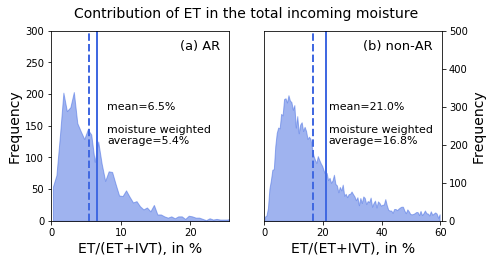

In [13]:
fig1 = plt.figure(figsize=(7,3.5))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

xmax = 25.5
ymax = 300
ax1.fill_between(hist_bin_ct, np.zeros(nbins), hist_AR, color='royalblue', alpha=0.5)
ax1.plot(np.ones(10)*ratio_AR.mean(), np.arange(0,1600,160), color='royalblue', lw=2)
ax1.plot(np.ones(10)*m_ratio_AR, np.arange(0,1600,160), color='royalblue', lw=2, linestyle='--')
loc = ratio_AR.mean()
ax1.text(8, ymax*0.6, 'mean=%.1f%%' % loc, ha='left', va='center', fontsize=11)
loc = m_ratio_AR
ax1.text(8, ymax*0.45, 'moisture weighted\naverage=%.1f%%' % loc, ha='left', va='center', fontsize=11)
ax1.text(25.5*0.95, ymax*0.95, '(a) AR', ha='right', va='top', fontsize=13)
ax1.set_xlim([0, xmax])
ax1.set_ylim([0, ymax])

xmax = 60.5
ymax = 500
ax2.fill_between(hist_bin_ct, np.zeros(nbins), hist_nAR, color='royalblue', alpha=0.5)
ax2.plot(np.ones(10)*ratio_nAR.mean(), np.arange(0,1600,160), color='royalblue', lw=2)
ax2.plot(np.ones(10)*m_ratio_nAR, np.arange(0,1600,160), color='royalblue', lw=2, linestyle='--')
loc = ratio_nAR.mean()
ax2.text(22, ymax*0.6, 'mean=%.1f%%' % loc, ha='left', va='center', fontsize=11)
loc = m_ratio_nAR
ax2.text(22, ymax*0.45, 'moisture weighted\naverage=%.1f%%' % loc, ha='left', va='center', fontsize=11)
ax2.text(xmax*0.95, ymax*0.95, '(b) non-AR', ha='right', va='top', fontsize=13)
ax2.set_xlim([0, xmax])
ax2.set_ylim([0, ymax])


# decoration
for axis in [ax1, ax2]:
    axis.set_xlabel('ET/(ET+IVT), in %', fontsize=14)
    axis.set_ylabel('Frequency', fontsize=14)

ax1.text(28, 320, 'Contribution of ET in the total incoming moisture', ha='center', fontsize=14)

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

#fig1.savefig(plotdir + 'fig_R3.ET_moistuer_contrib.full_ocean.png', dpi=600)

plt.show()
plt.close()
del(fig1)